In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [3]:
# Carregando dados
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

# Removendo colunas desnecessárias
del data["Dividends"]
del data["Stock Splits"]

# Limpeza de dados
data.dropna(inplace=True)

# Definindo X e y
X = data['Open'].values.reshape(-1, 1)
y = data['High'].values.reshape(-1, 1)


In [4]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalização dos dados
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)  # Atenção: usar apenas transform aqui
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [5]:
# Implementação da Floresta Aleatória
modelo_floresta = RandomForestRegressor(n_estimators=100, random_state=0)
modelo_floresta.fit(X_train_scaled, y_train_scaled.ravel())


RandomForestRegressor(random_state=0)

In [6]:
# Previsões
y_pred_scaled = modelo_floresta.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))


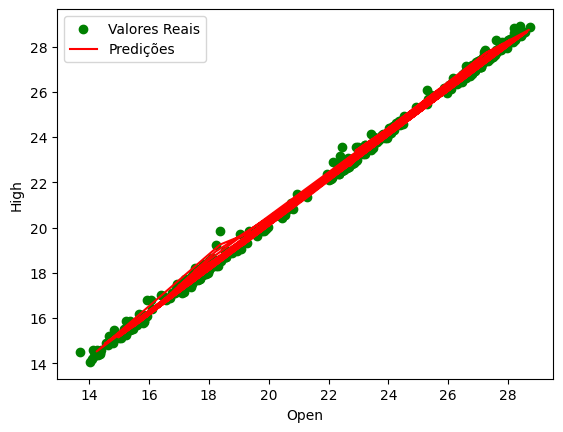

In [7]:
# Visualizando previsões
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [8]:
# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [9]:
# Exibindo métricas
print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9973192015376825
Erro Percentual Absoluto Médio (MAPE): 0.7820708631125318%
Erro Médio Absoluto (MAE): 0.16898908470785326
Erro Quadrático Médio (MSE): 0.051199431906821725
